<a href="https://colab.research.google.com/github/yejianfeng2014/AI/blob/master/keras_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

tf.__version__

在Keras中，每个layer instance 都可以被看成是一个函数，其输入是一个tensor，输出也是一个tensor。例如在下面这个实现全连接网络的例子中，你可以看到第一个Dense层的输入是inputs，其输出是x，而且这个x又被当做是第二个Dense层的输入。最初的输入tensor和最后的输出tensor共同定义了模型。而模型的训练方法则跟Sequential model中的情况一致。


In [0]:
from keras.layers import Input,Dense
from keras.models import Model
# this return a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation = 'relu')(inputs)

x= Dense(64,activation = 'relu')(x)

predictions = Dense(10,activation = 'softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers

model =Model(input = inputs,outputs = predictions)

model.compile (optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrix = ['accuracy'])

# model.fit(data,label)



model.summary()


“多输入-多输出”模型
---
![avatar][doge] 

[doge]: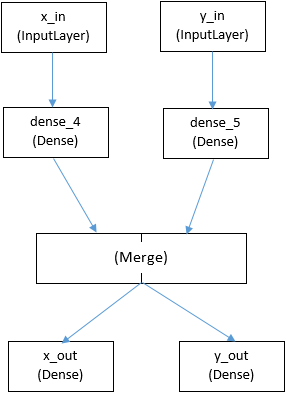




In [0]:
from keras.layers import concatenate
x_in  = Input(shape = (100,) ,name = 'x_in')

y_in = Input(shape = (100,) ,name = 'y_in')

x = Dense (64,activation = 'relu')(x_in)

y = Dense( 64,activation = 'relu')(y_in)

z = concatenate ([x,y])

x = Dense(1,activation = 'sigmoid' ,name = 'x_out')(z)

y = Dense(10,activation = 'softmax', name = 'y_out')(z)


model = Model(inputs=[x_in, y_in], outputs=[x, y])
 
model.summary()





In [0]:
from keras.utils import to_categorical
 
import numpy as np
data = np.random.random((1000, 100))
xs = np.random.randint(2, size=(1000, 1))
ys = np.random.randint(10, size=(1000, 1))
 
model.compile(optimizer='rmsprop', loss=['binary_crossentropy', 'categorical_crossentropy'],
              loss_weights=[1., 0.2])
 
model.fit([data, data], [xs, to_categorical(ys)],
          epochs=10, batch_size=32)


你也可以使用字典 (refering to the names of the output tensors)：

In [0]:
model.compile(optimizer='rmsprop',
              loss={'x_out': 'binary_crossentropy', 'y_out': 'categorical_crossentropy'},
              loss_weights={'x_out': 1., 'y_out': 0.2})
 
# And trained it via:
model.fit({'x_in': data, 'y_in': data},
          {'x_out': xs, 'y_out': to_categorical(ys)},
          epochs=1, batch_size=32)


共享层

In [0]:
inputs = Input(shape=(64,))

# a layer instance is callable on a tensor, and returns a tensor
layer_we_share = Dense(64, activation='relu')

# Now we apply the layer twice
x = layer_we_share(inputs)
x = layer_we_share(x)

predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()